<a href="https://colab.research.google.com/github/tasmianahreen/autism-prediction/blob/main/autism_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Dependencies



In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

2. Loading the dataset

In [2]:
df = pd.read_csv('/content/train.csv')

3. Inspecting & cleaning the data

In [4]:
df.shape

(800, 22)

In [5]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [6]:
df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,1,16.597187,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,1,20.703001,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,0,5.711481,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,0,16.414305,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,0,46.966113,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


3.1 Display all columns of the dataframe

In [9]:
pd.set_option('display.max_columns', None)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

3.2 Comverting datatype of age to integer

In [11]:
df['age'] = df['age'].astype(int)

In [14]:
df.head(2)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0


In [16]:
for i in df.columns:
  numerical_features = ['ID', 'age', 'result']
  if i not in numerical_features:
    print(i, df[i].unique())
    print("-"*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

3.3 Dropping ID & age columns as they only have unique values

In [17]:
df = df.drop(columns=['ID', 'age_desc'])

In [18]:
df.shape

(800, 20)

In [19]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,Self,0


3.4 Renaming columns to fix typos

In [20]:
df = df.rename(columns={"austim": "autism"})

In [21]:
df = df.rename(columns={"contry_of_res": "country_of_res"})

In [22]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,Self,0


In [23]:
df['country_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [24]:
mapping_dictionary = {"Viet Nam": "Vietnam",
                      "AmericanSamoa": "United States",
                      "Hong Kong": "China"}
#replace redundant values in country
df['country_of_res'] = df['country_of_res'].replace(mapping_dictionary)

In [26]:
df["country_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

In [27]:
#target class distribution
df["Class/ASD"].value_counts()

,count
Class/ASD,
0,639
1,161


## **This shows that there are more people without autism than with autism**

Insights
1. missing values in ethnicity & relation columns
2. age_desc has only 1 unique value, so we removed it as it is not important for prediction
3. fixed typos in country names
4. identified class imbalance in the target columns

## **4. Exploratory Data Analysis**

In [28]:
df.shape

(800, 20)

In [29]:
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0


In [30]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


## **Univariate analysis**

Numerical columns
- age
- result

In [35]:
# set the theme
sns.set_theme(style="darkgrid")


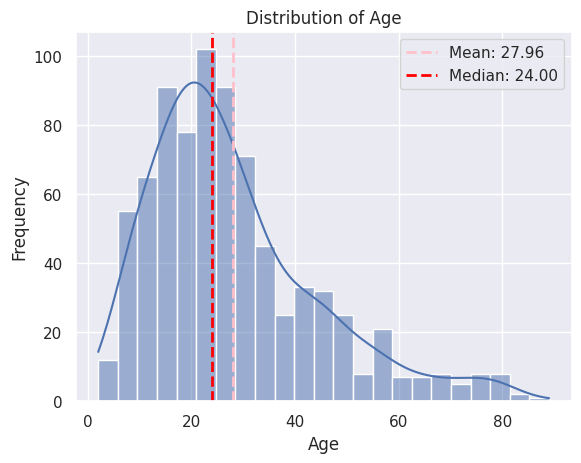

In [40]:
# histogram for 'age'

sns.histplot(data=df, x='age', kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

#calculate mean & median
age_mean = df['age'].mean()
age_median = df['age'].median()

#add vertical lines for mean & median
plt.axvline(age_mean, color='pink', linestyle='dashed', linewidth=2, label=f'Mean: {age_mean:.2f}')
plt.axvline(age_median, color='red', linestyle='dashed', linewidth=2, label=f'Median: {age_median:.2f}')

plt.legend()

plt.show()

Right skewed values - mean > median


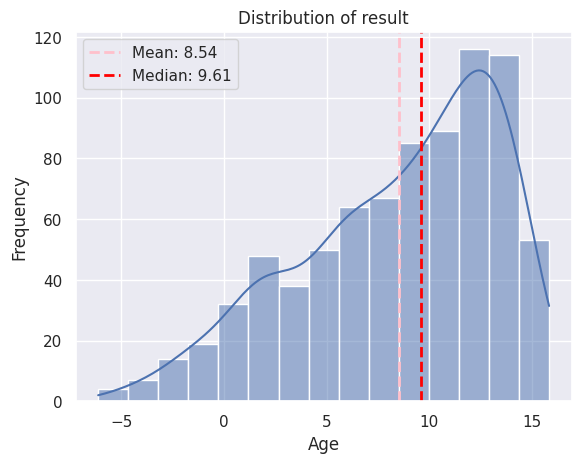

In [42]:
# histogram for 'result'

# set the theme
sns.set_theme(style="darkgrid")

sns.histplot(data=df, x='result', kde=True)
plt.title('Distribution of result')
plt.xlabel('Age')
plt.ylabel('Frequency')

#calculate mean & median
age_mean = df['result'].mean()
age_median = df['result'].median()

#add vertical lines for mean & median
plt.axvline(age_mean, color='pink', linestyle='dashed', linewidth=2, label=f'Mean: {age_mean:.2f}')
plt.axvline(age_median, color='red', linestyle='dashed', linewidth=2, label=f'Median: {age_median:.2f}')

plt.legend()

plt.show()


## **Left skewed values**

## **Box plots for identifying outliers**

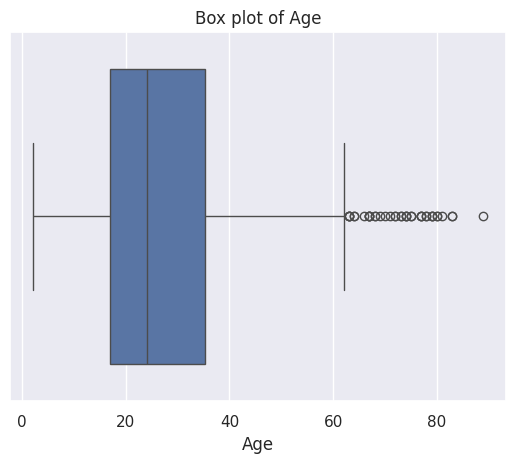

In [43]:
sns.boxplot(data=df, x='age')
plt.title('Box plot of Age')
plt.xlabel('Age')
plt.show()
# circles represent outliers

Q3 - Q1 = IQR
1.5*IQR = outliers

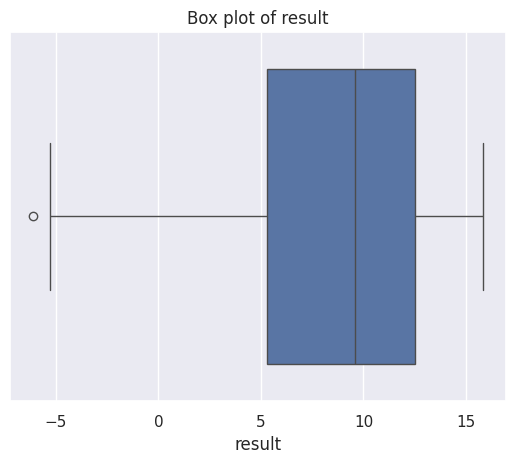

In [44]:
sns.boxplot(data=df, x='result')
plt.title('Box plot of result')
plt.xlabel('result')
plt.show()
# circles represent outliers

In [47]:
#counting the outliers using IQR for age
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]

In [49]:
print(len(outliers))

39


In [50]:
#counting the outliers using IQR for result
Q1 = df["result"].quantile(0.25)
Q3 = df["result"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
res_outliers = df[(df['result'] < lower_bound) | (df['result'] > upper_bound)]

In [51]:
res_outliers

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,relation,Class/ASD
698,0,0,0,0,0,0,0,0,0,0,62,f,Asian,no,no,Jordan,no,-6.137748,Self,0


## Due to class imbalance, we can replace the outlier values w/ median

## **Univariate analysis of categorical columns**

In [52]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'autism', 'country_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

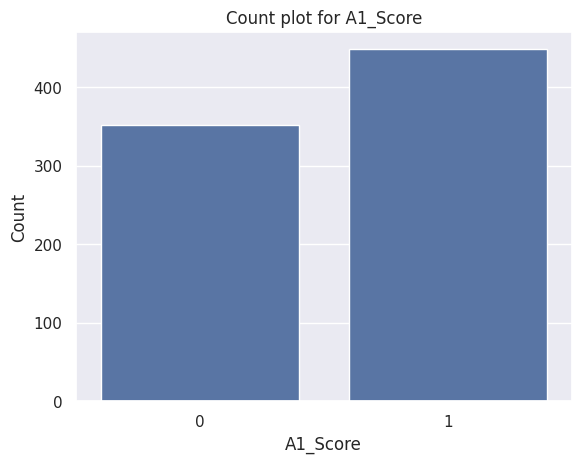

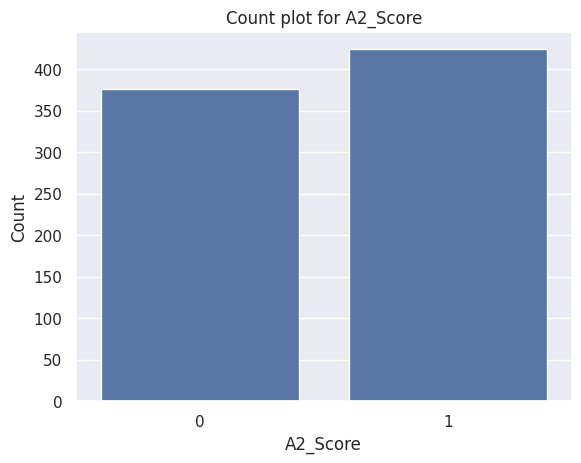

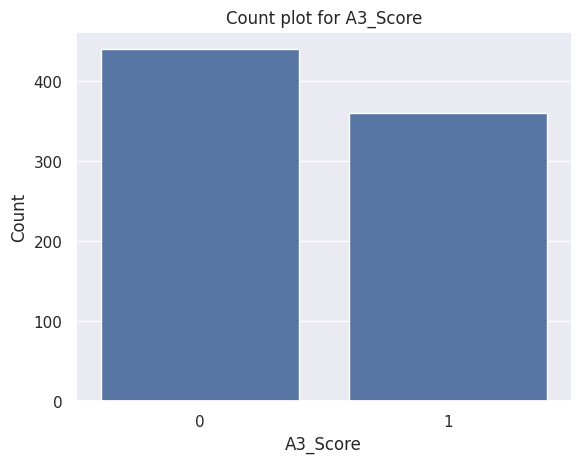

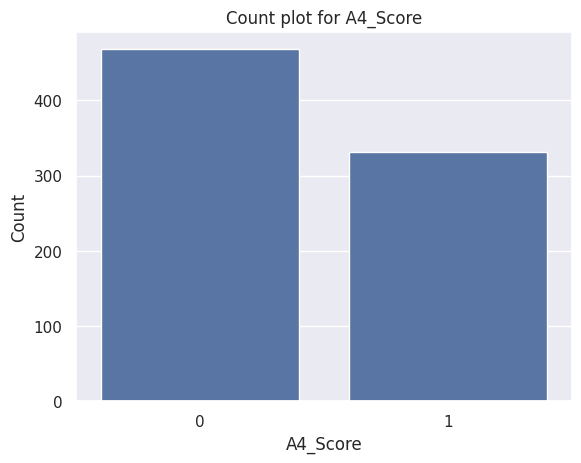

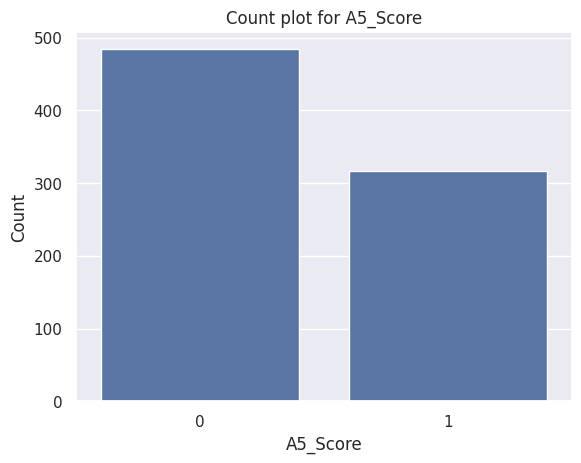

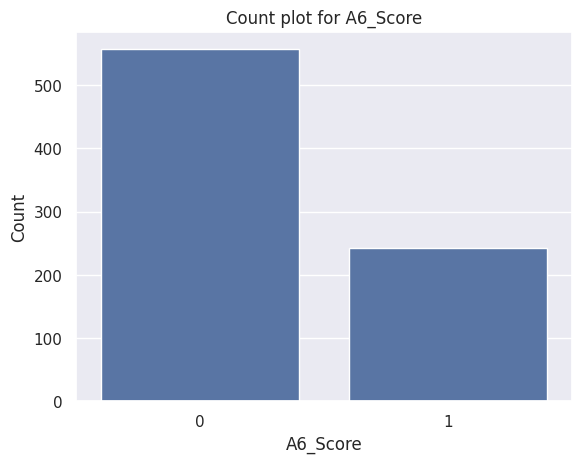

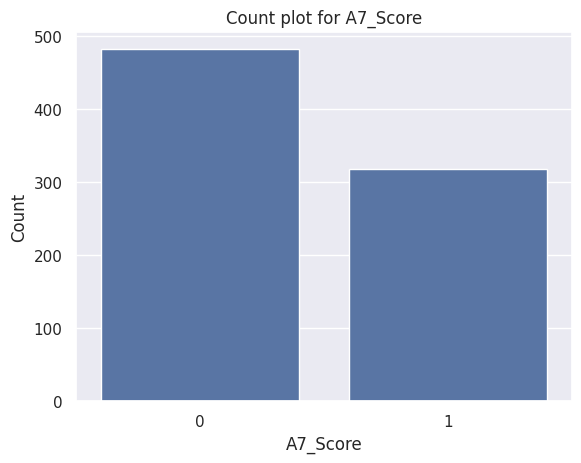

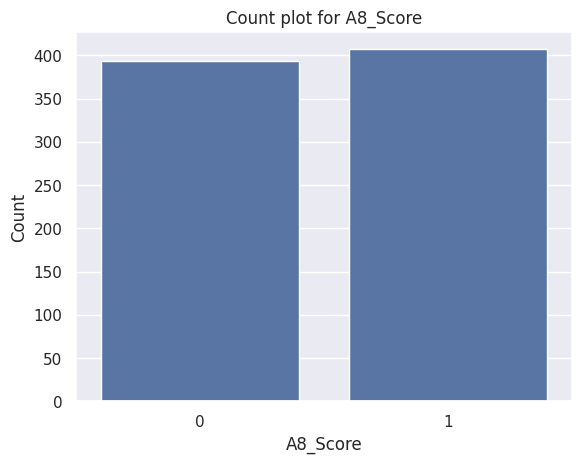

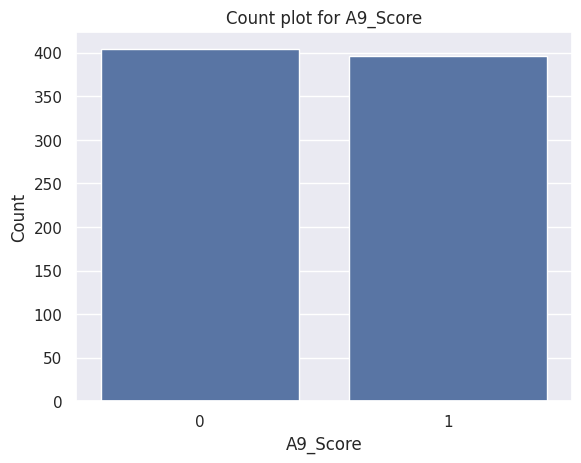

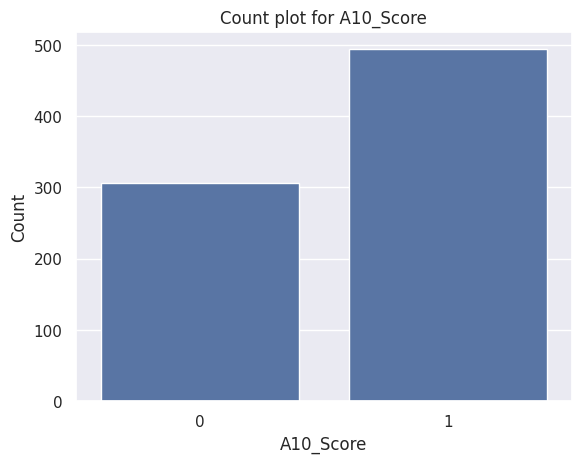

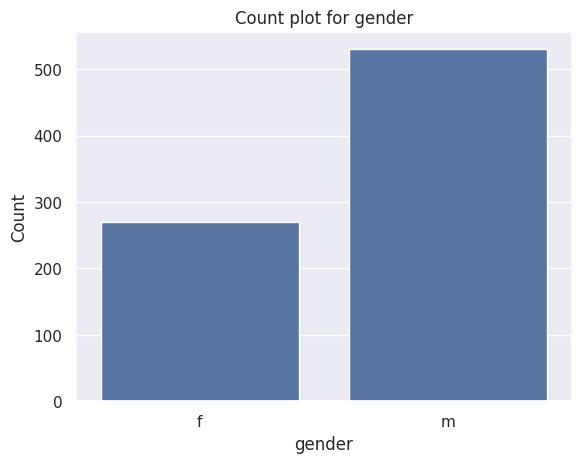

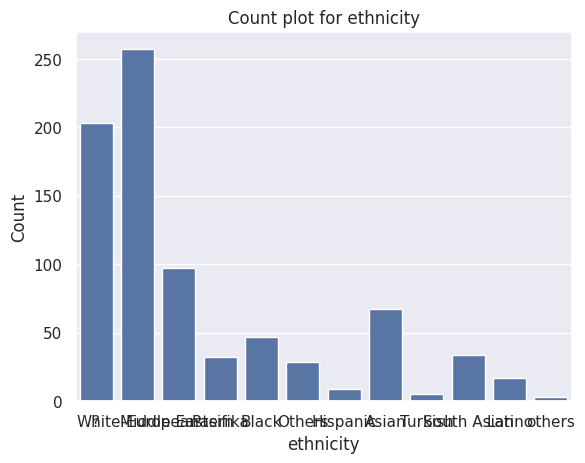

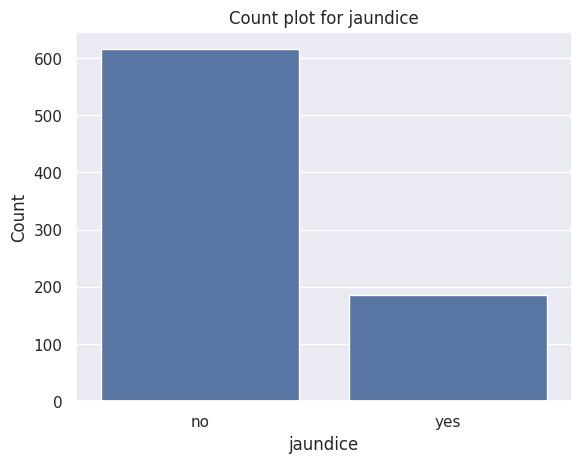

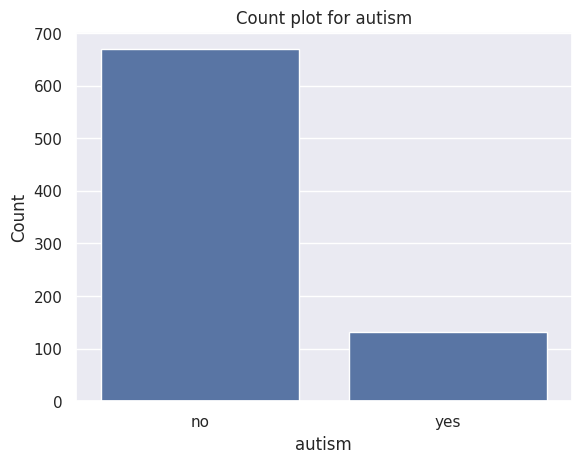

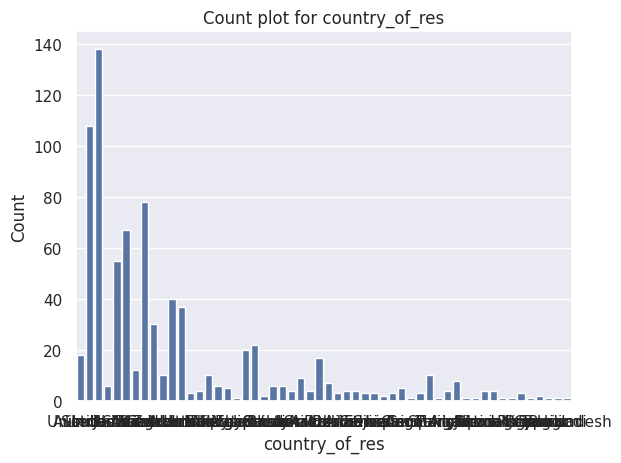

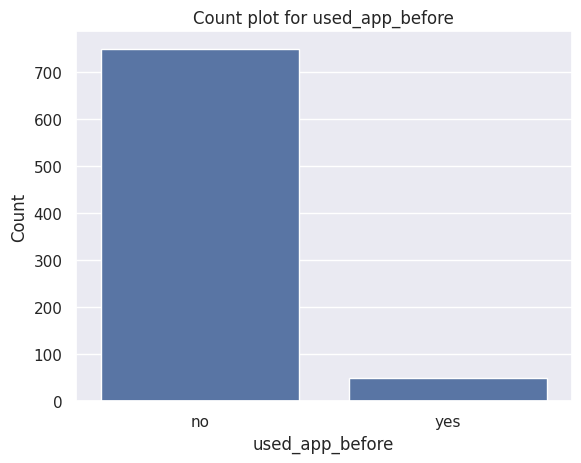

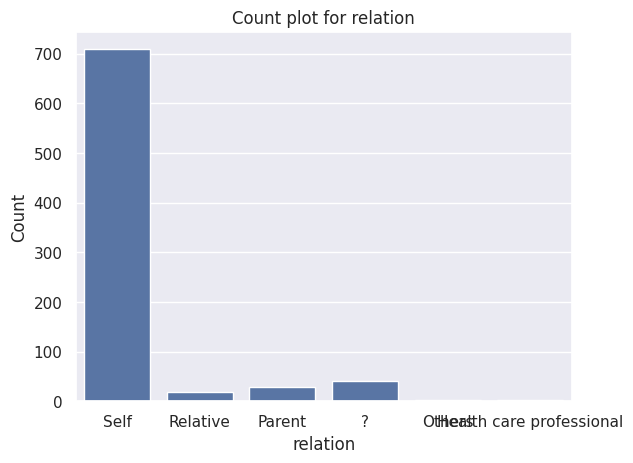

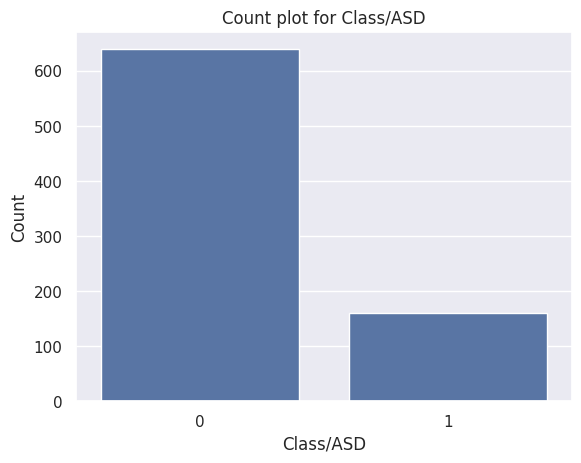

In [55]:
categorical_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'autism', 'country_of_res', 'used_app_before',
       'relation', 'Class/ASD']
for col in categorical_columns:
  sns.countplot(x = df[col])
  plt.title(f"Count plot for {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()


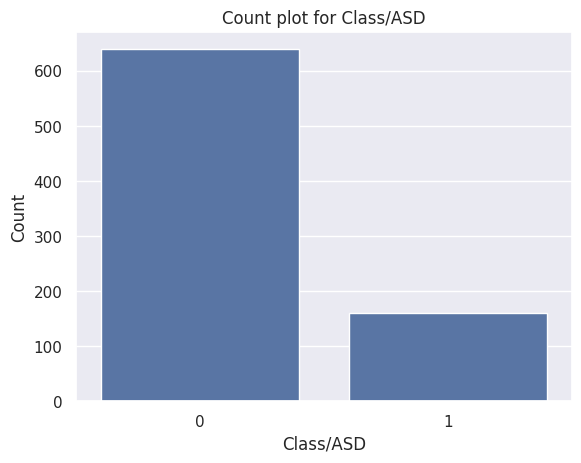

In [56]:
# count plot for target column Class/ASD

sns.countplot(x = df['Class/ASD'])
plt.title(f"Count plot for Class/ASD")
plt.xlabel('Class/ASD')
plt.ylabel("Count")
plt.show()

In [57]:
df['Class/ASD'].value_counts()

,count
Class/ASD,
0,639
1,161


In [ ]:
# handle missing values in ethnicity & relation columns

In [64]:
df['ethnicity'] = df['ethnicity'].replace({"?": "Others", "others": "Others"}
)
df['relation'].unique()

array(['Self', 'Others'], dtype=object)

In [63]:
df['relation'] = df['relation'].replace({"?": "Others",
                              "Relative": "Others",
                              "Parent": "Others",
                              "Health care professional": "Others"})

In [66]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,Others,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,Others,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,Others,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,Others,no,no,South Africa,no,-4.777286,Self,0


## **Label Encoding**

In [67]:
# identify columns with "object" datatype
object_cols = df.select_dtypes(include=['object']).columns

In [68]:
print(object_cols)

Index(['gender', 'ethnicity', 'jaundice', 'autism', 'country_of_res',
       'used_app_before', 'relation'],
      dtype='object')


In [74]:
# initialize a dictionary to store encoders
encoders = {}  # Change to a dictionary if you need to access by column name

# apply label encoding and store the encoders
for column in object_cols:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder  # Store in the dictionary using column name

# save encoders as a pickle file
with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)

In [75]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'autism': LabelEncoder(),
 'country_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [77]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,44,0,-4.777286,1,0


Bivariate analysis

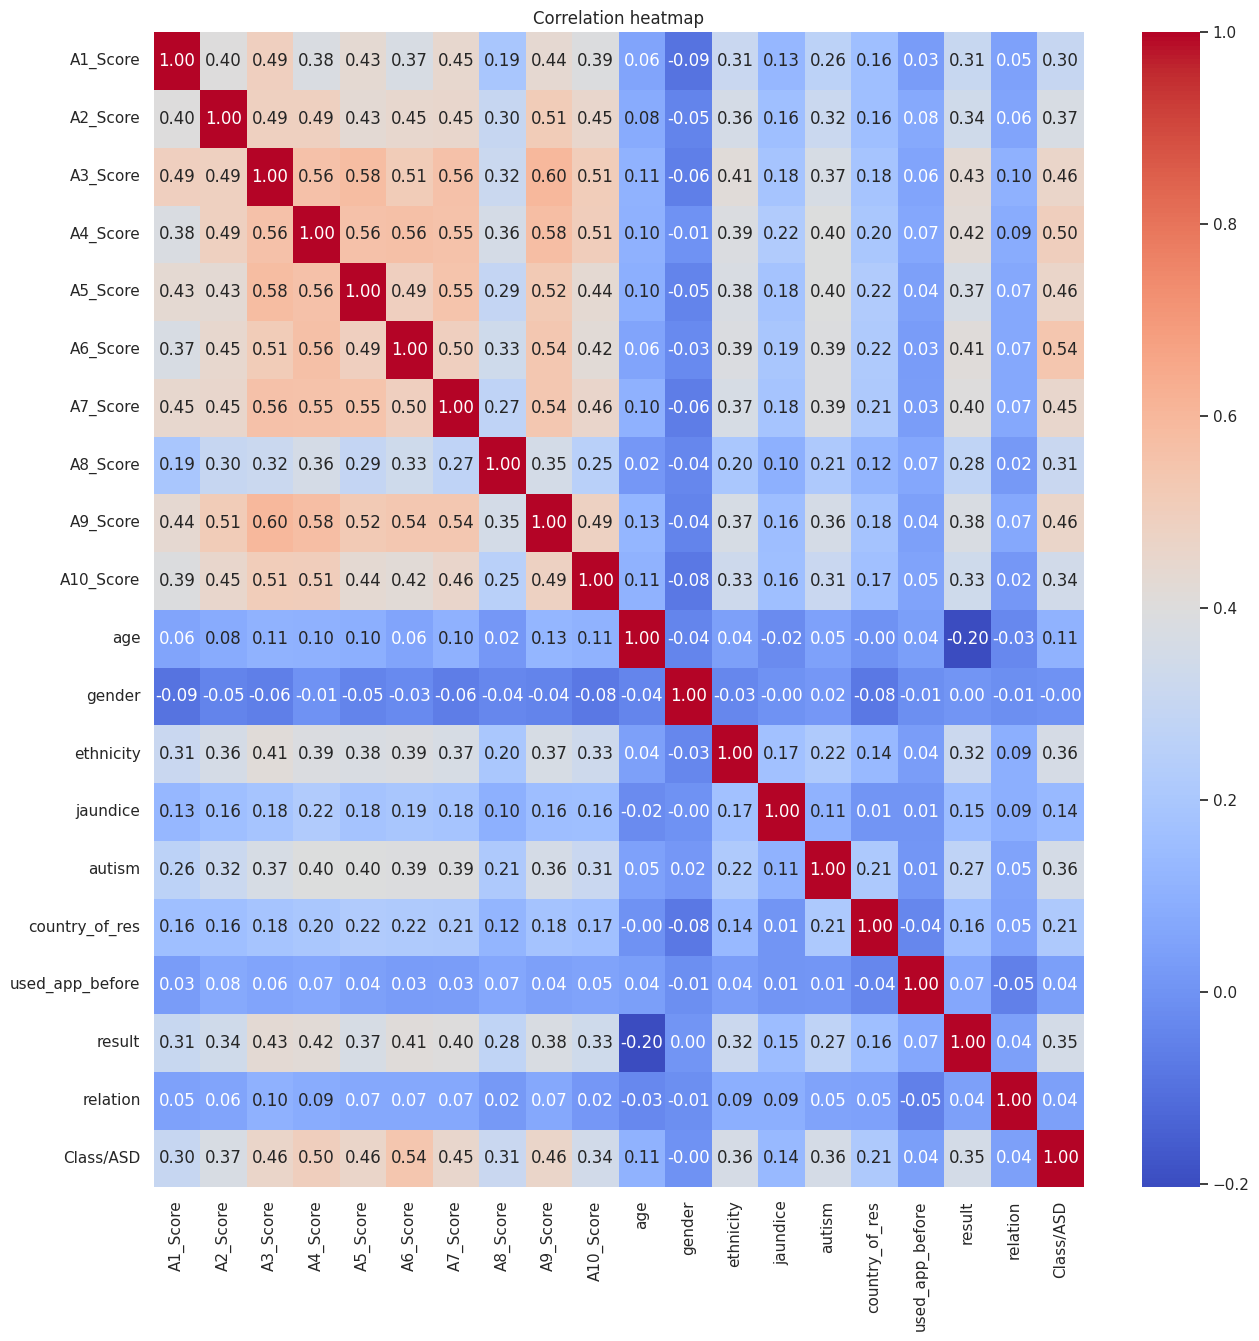

In [80]:
#correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation heatmap')
plt.show()

Findings from EDA
- there are a few outliers in age & result columns
- class imbalance in the target column
- class imbalance in the categorical features
- performed label encoding

## **Data Preprocessing**

In [81]:
# handling outliers

# replace outliers with median

def replace_outliers_with_median(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  median = df[column].median()
  df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median, df[column])
  return df

In [82]:
# replace outliers in age
df = replace_outliers_with_median(df, 'age')

# replace outliers in result
df = replace_outliers_with_median(df, 'result')

In [85]:
df.tail()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,relation,Class/ASD
795,0,1,0,0,0,0,0,0,1,1,16.0,1,2,0,0,34,0,12.999501,1,0
796,0,1,1,0,0,1,0,1,1,1,20.0,1,9,0,0,16,0,13.561518,1,0
797,0,0,0,0,0,0,0,0,0,0,5.0,1,7,1,0,34,0,2.653177,1,0
798,0,0,0,0,0,0,0,0,0,0,16.0,0,5,0,0,14,0,9.069342,1,0
799,0,1,0,0,0,0,0,0,0,0,46.0,0,5,0,0,50,1,2.243304,1,0


## **Train/Test split**

In [86]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'autism', 'country_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [87]:
X = df.drop(columns=['Class/ASD'])
y = df['Class/ASD']

In [88]:
print(X)
print(y)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         0         1         0         1         0         1   
1           0         0         0         0         0         0         0   
2           1         1         1         1         1         1         1   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
795         0         1         0         0         0         0         0   
796         0         1         1         0         0         1         0   
797         0         0         0         0         0         0         0   
798         0         0         0         0         0         0         0   
799         0         1         0         0         0         0         0   

     A8_Score  A9_Score  A10_Score   age  gender  ethnicity  jaundice  auti

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
print(y_train.shape)
print(y_test.shape)

(640,)
(160,)


In [92]:
y_train.value_counts()

,count
Class/ASD,
0,515
1,125


In [93]:
y_test.value_counts()

,count
Class/ASD,
0,124
1,36


## **SMOTE (Synthetic Minority Oversampling Technique)**

In [94]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [95]:
print(y_train_resampled.shape)

(1030,)


In [96]:
print(y_train_resampled.value_counts())

Class/ASD
1    515
0    515
Name: count, dtype: int64


## **Model Training**

In [100]:
# list of classifiers
models = {"Decision Tree": DecisionTreeClassifier(random_state=42),
          "Random Forest": RandomForestClassifier(random_state=42),
          "XGBoost": XGBClassifier(random_state=42)}

In [101]:
# cross validation
cross_scores = {}

# perform for each model

for model_name, model in models.items():
  print(f"Training {model_name}...")
  scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
  cross_scores[model_name] = scores
  print(f"{model_name} Cross-Validation Accuracy: {scores.mean():.2f}")

Training Decision Tree...
Decision Tree Cross-Validation Accuracy: 0.86
Training Random Forest...
Random Forest Cross-Validation Accuracy: 0.92
Training XGBoost...
XGBoost Cross-Validation Accuracy: 0.90


In [102]:
cross_scores

{'Decision Tree': array([0.7961165 , 0.87864078, 0.87378641, 0.8592233 , 0.87378641]),
 'Random Forest': array([0.90776699, 0.92718447, 0.9223301 , 0.91747573, 0.9223301 ]),
 'XGBoost': array([0.87378641, 0.9223301 , 0.89320388, 0.91262136, 0.91747573])}

## **Model Selection & Hyperparameter Training**

In [105]:
# Initializing models
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboostclassifier = XGBClassifier(random_state=42)


In [106]:
#hyperparameter grids for RandomizedSearchCV
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 50, 70],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

param_grid_xgb = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [1, 5, 7, 10],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]}

In [107]:
# hyperparameter training for three tree based models

# the below steps can be automated using a for loop/pipeline

# perform RandomizedSearchCV for each model
random_search_dt = RandomizedSearchCV(estimator=decision_tree, param_distributions=param_grid_dt, n_iter=100, cv=5, scoring='accuracy', random_state=42)
random_search_rf = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid_dt, n_iter=100, cv=5, scoring='accuracy', random_state=42)
random_search_xgb = RandomizedSearchCV(estimator=xgboostclassifier, param_distributions=param_grid_xgb, n_iter=100, cv=5, scoring='accuracy', random_state=42)


In [108]:
# fit the RandomizedSearchCV objects to the training data
random_search_dt.fit(X_train_resampled, y_train_resampled)
random_search_rf.fit(X_train_resampled, y_train_resampled)
random_search_xgb.fit(X_train_resampled, y_train_resampled)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=100,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [1, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [110]:
print(random_search_dt.best_estimator_)
print(random_search_dt.best_score_)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)
0.8776699029126214


In [114]:
best_model_name = None
best_score = 0

if random_search_dt.best_score_ > best_score:
  best_score = random_search_dt.best_score_
  best_model_name = "Decision Tree"

if random_search_rf.best_score_ > best_score:
  best_score = random_search_rf.best_score_
  best_model_name = "Random Forest"

if random_search_xgb.best_score_ > best_score:
  best_score = random_search_xgb.best_score_
  best_model_name = "XGBoost"

print(f"Best Model: {best_model_name} with accuracy: {best_score:.2f}")
print(f"Best Cross Validation Accuracy: {best_score:.2f}")

Best Model: Random Forest with accuracy: 0.92
Best Cross Validation Accuracy: 0.92


In [116]:
# save the best model
with open("best_model.pkl", "wb") as f:
  pickle.dump(best_model_name, f)

In [117]:
# evaluate on test data
y_test_pred = random_search_dt.predict(X_test)
print("Classification report:", classification_report(y_test, y_test_pred))
print("Confusion matrix:", confusion_matrix(y_test, y_test_pred))
print("Accuracy Score:", accuracy_score(y_test, y_test_pred))

Classification report:               precision    recall  f1-score   support

           0       0.87      0.88      0.88       124
           1       0.57      0.56      0.56        36

    accuracy                           0.81       160
   macro avg       0.72      0.72      0.72       160
weighted avg       0.80      0.81      0.81       160

Confusion matrix: [[109  15]
 [ 16  20]]
Accuracy Score: 0.80625
